## Лабораторная работа 03 (проверка качества данных)
### Задание 1: Проверка целостности данных.
Используйте набор данных о продажах и проверьте, заполнены ли все необходимые поля. Если обнаружены пропущенные значения, определите, какой процент они составляют от общего количества данных. 

In [5]:
import pandas as pd

retail = pd.read_csv("data/online_retail_II.csv")
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


<Axes: >

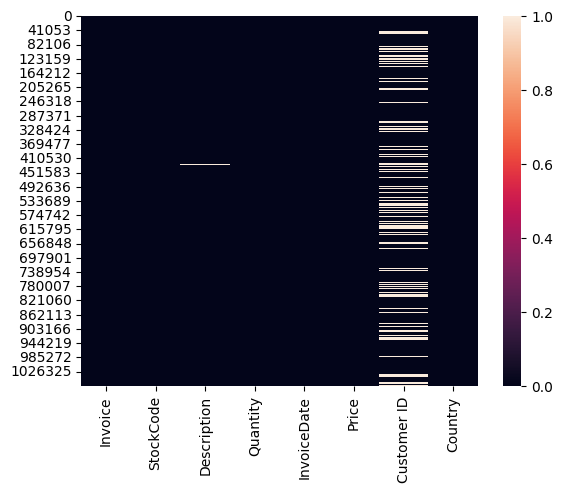

In [33]:
import seaborn as sns
sns.heatmap(retail.isna())

In [29]:
missing_percent = retail.isna().mean() * 100
print((missing_percent).round(2).astype(str) + '%')

Invoice          0.0%
StockCode        0.0%
Description     0.41%
Quantity         0.0%
InvoiceDate      0.0%
Price            0.0%
Customer ID    22.77%
Country          0.0%
dtype: object


### Задание 2: Проверка консистентности данных.
Рассмотрите набор данных о климате и проверьте, соблюдаются ли форматы дат во всех записях. 

In [31]:
temperature = pd.read_csv("data/GlobalLandTemperaturesByCity.csv")
temperature

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [ ]:
temperature["dt_parsed"] = pd.to_datetime(temperature["dt"], errors="coerce")
invalid_dates = temperature["dt_parsed"].isna().sum()
print(f"Некорректных дат: {invalid_dates}")

Всего строк: 8599212
Некорректных дат: 0


### Задание 3: Проверка актуальности данных.
Анализируя набор данных о твитах, проверьте даты публикации твитов и определите, какие из них актуальны на текущий момент.
Набор данных для использования: "COVID19 Tweets" на Kaggle, включающий твиты о пандемии COVID-19.

In [34]:
tweets = pd.read_csv("data/covid19_tweets.csv")
tweets

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [35]:
tweets["dt_parsed"] = pd.to_datetime(tweets["date"], errors="coerce")
invalid_dates = tweets["dt_parsed"].isna().sum()
print(f"Некорректных дат: {invalid_dates}")

Некорректных дат: 0


In [36]:
tweets_sorted = tweets.sort_values(by="dt_parsed", ascending=False)
tweets_sorted.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,dt_parsed
166656,🍺¯\_(ツ)_/¯,"Boston, MA","Father, husband, musician, dog-lover. All opin...",2009-04-13 13:14:46,24,197,1409,False,2020-08-30 09:07:39,It’s a shame magots can’t celebrate @realDonal...,NaN,Twitter for iPhone,False,2020-08-30 09:07:39
166657,Kings Place,"Kings Cross, London","An open, multi-arts venue presenting an advent...",2009-02-26 12:16:47,18930,6213,23986,False,2020-08-30 09:07:34,⏰ Today @ 11:30!\nTune in for the latest #Bach...,['Bach'],Twitter Web App,False,2020-08-30 09:07:34
166658,Keith Bishop 👨‍👨‍👧‍👦 🏳️‍🌈,"Newman University, UK","Foster Dad, Youth Worker & Senior Lecturer (Ch...",2015-06-20 10:56:58,1244,667,1140,False,2020-08-30 09:07:26,Concerns have been raised that return to unive...,['COVID19'],Twitter for iPad,False,2020-08-30 09:07:26
166660,Dirk Haussecker,RNA World,RNA(i) Therapeutics Investor-Scientist who lov...,2011-11-10 12:00:58,9341,339,7276,False,2020-08-30 09:07:25,"In Germany, we have ~1-3 deaths/day while dail...",NaN,Twitter Web App,False,2020-08-30 09:07:25
166661,FX_Baba,NaN,FX & Stock Trader - Tweets are not financial a...,2017-06-15 18:35:38,277,318,881,False,2020-08-30 09:07:25,Another great thread about how unreliable and ...,NaN,Twitter for Android,False,2020-08-30 09:07:25


<Axes: xlabel='dt_parsed'>

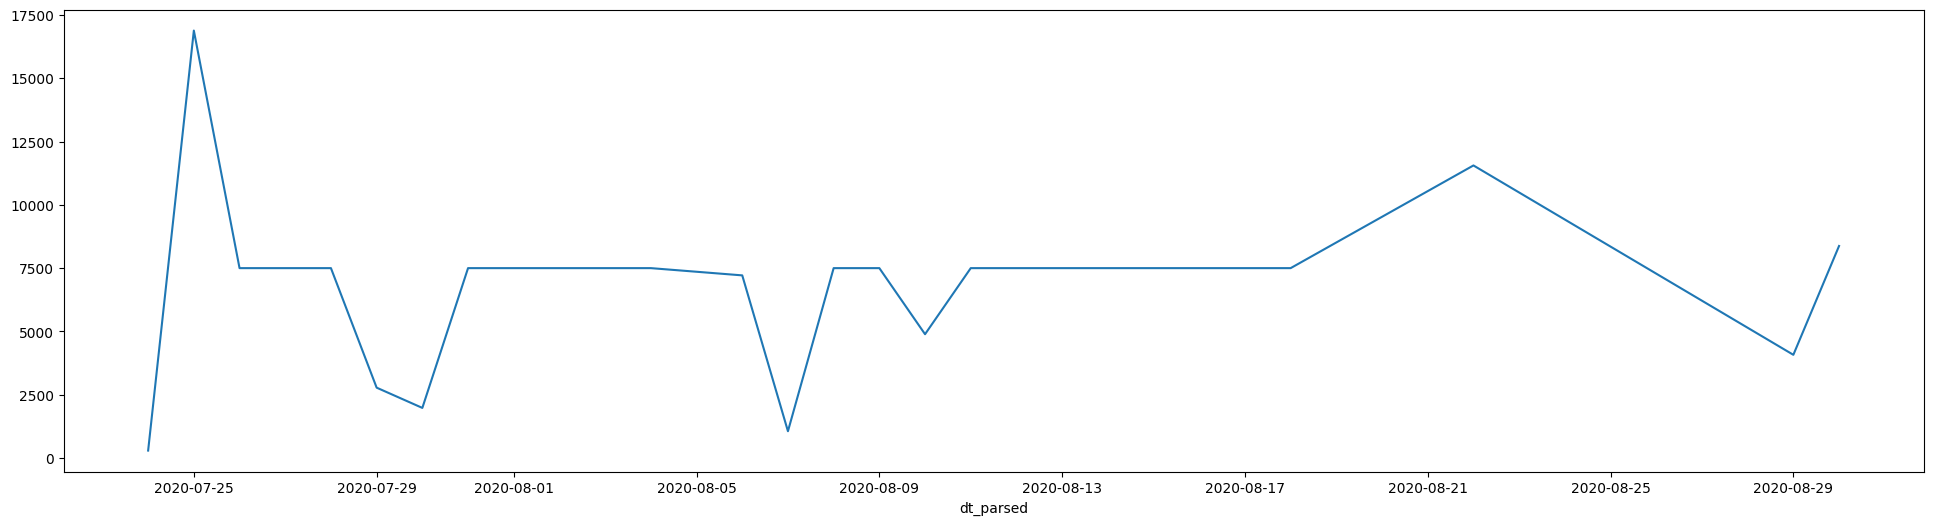

In [37]:
import matplotlib.pyplot as plt
tweets_by_day = tweets.groupby(tweets["dt_parsed"].dt.date).size()
plt.figure(figsize=(24,6))
tweets_by_day.plot()

### Задание 4: Проверка полноты данных.
Рассмотрите набор данных о заболеваемости раком, проанализируйте, приведены ли данные по всем странам или некоторые из них отсутствуют. 

In [25]:
cancer_patients = pd.read_csv("data/global_cancer_patients_2015_2024.csv")
cancer_patients

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [30]:
countries = cancer_patients["Country_Region"].unique()
print(f"countries: {len(countries)}")

countries: 10
